# Рынок заведений общественного питания Москвы

Открываем небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Чтобы представить проект инвесторам, необходимо исследовать рынок.

Имеем данные о заведениях общественного питания в Москве.

**Описание данных:**

Таблица rest_data:
* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.

План:

1. [Загрузка и предобработка данных](#pred)
2. [Соотношение видов объектов общественного питания по количеству](#2)
3. [Соотношение сетевых и несетевых заведений по количеству](#3)
4. [Сетевые виды объектов общественного питания](#4)
5. [Анализ сетевых заведений по посадочным местам](#5)
6. [Среднее количество посадочных мест по типу заведения](#6)
7. [Топ-10 улиц по количеству объектов общественного питания](#7)
8. [Число улиц с одним объектом общественного питания](#8)
9. [Топ-10 районов с улицами, на которых 1 заведение общепита](#9)
10.[Вывод](#10)

## Предобработка данных <a id="pred"></a>

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from io import BytesIO
import requests

In [2]:
# Чтение файла
df = pd.read_csv('/datasets/rest_data.csv')

In [3]:
# предварительный анализ на пропуски и тип данных
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


### Пропуски

In [4]:
df.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

### Дубликаты

In [5]:
print(df['object_name'].duplicated().sum())
print(df['address'].duplicated().sum())
df.duplicated().sum()

4973
6258


0

In [6]:
df['object_name'].describe()

count        15366
unique       10393
top       Столовая
freq           267
Name: object_name, dtype: object

In [7]:
df['address'].describe()

count                                      15366
unique                                      9108
top       город Москва, Ходынский бульвар, дом 4
freq                                          95
Name: address, dtype: object

In [8]:
df['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [9]:
pd.options.display.max_colwidth = 210
df[df.duplicated(['object_name', 'address'], keep=False)].head(15)

,id,object_name,chain,object_type,address,number
113,28608,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",34
114,28613,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,закусочная,"город Москва, Бригадирский переулок, дом 3-5",216
115,28614,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",12
576,149218,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",40
579,149227,Общественное питание,нет,столовая,"город Москва, Павелецкая площадь, дом 1",70
580,149205,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",35
581,149131,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",39
1408,22982,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",49
1409,151267,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",45
1647,151866,Ресторан «Практика By Darvin»,нет,бар,"город Москва, Большая Грузинская улица, дом 37, строение 2",45


Есть дубликаты в названиях и адресах. Не думаю, что это критично, несколько кафе могут быть в одном здании. Есть универистетские столовые. Название ресторанов также могут повторяться.

Самый часто повторяющийся адрес: город Москва, Ходынский бульвар, дом 4 - 95 раз

Самое часто повторяющееся название: Столовая - 267 раз.

### Аномалии

In [10]:
df.describe()

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


In [11]:
df.query('number==0')['number'].count()

1621

In [12]:
df.query('number==0')['object_type'].value_counts()

предприятие быстрого обслуживания    704
кафе                                 310
закусочная                           189
магазин (отдел кулинарии)            145
кафетерий                            113
буфет                                 68
ресторан                              45
бар                                   28
столовая                              19
Name: object_type, dtype: int64

In [13]:
df.query('number==0 and object_type == "ресторан"').head(15)

,id,object_name,chain,object_type,address,number
1873,79718,Макдоналдс,да,ресторан,"город Москва, поселение Московский, деревня Говорово, дом 1Б/Н",0
4490,152298,Фудмаркет. Яшечкина,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4491,152299,Фудмаркет. Грачева,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4492,152305,Фудмаркет. Шапиро,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4493,152307,Фудмаркет. Салпагарова,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4501,152255,Фудмаркет.Швыдкой,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4502,152222,Фудмаркет.Паритова,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4503,152224,Фудмаркет. Рогачикова,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4504,152216,Фудмаркет. Галичкин,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
6113,27193,МАКСИМАЛЬНЫЙ РЕСТОРАН,нет,ресторан,"город Москва, Профсоюзная улица, дом 61А",0


In [14]:
print(np.percentile(df['number'], [95,99]))

[214. 300.]


In [15]:
df.query('number==0 and object_type in ["ресторан", "кафе", "бар", "столовая", "буфет"]')['number'].count()

470

In [16]:
df.query('number>250')['number'].count()

286

Есть заведения без посадочных мест. Всего их 10.5% от общей выборки. 

Предположу, что в заведения без посадочных мест - это доставка и еда на вынос, также могут быть стоячие места у барной стойки, к примеру. Ничего не буду делать с этими данными.

Я удалю заведения превышающие 250 посадочных мест, так как в данных всего 5% заведение, у которых посадочных мест больше 214. Приму за аномалию. Итого я потеряю 5% данных.

In [17]:
df = df.query('~(number>250)')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15080 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15080 non-null  int64 
 1   object_name  15080 non-null  object
 2   chain        15080 non-null  object
 3   object_type  15080 non-null  object
 4   address      15080 non-null  object
 5   number       15080 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 824.7+ KB


In [18]:
df['object_name'].value_counts().head(30)

Столовая                    261
Кафе                        236
Шаурма                      234
KFC                         154
Шоколадница                 142
Бургер Кинг                 122
Макдоналдс                  121
Домино'с Пицца               86
Теремок                      84
Крошка Картошка              82
Пекарня                      76
Милти                        65
Суши Wok                     61
Буфет                        59
Папа Джонс                   50
СТОЛОВАЯ                     49
Кофе с собой                 44
Школьно-базовая столовая     41
КАФЕ                         41
Чайхона №1                   36
Выпечка                      36
Кафетерий                    35
Хинкальная                   35
Якитория                     33
Додо Пицца                   31
Кофе Хаус                    31
Starbucks                    30
Subway                       29
Кофейня                      29
МАКДОНАЛДС                   28
Name: object_name, dtype: int64

In [19]:
df['object_name'] = df['object_name'].str.lower()

In [20]:
df['object_name'].value_counts().head(60)

столовая                                312
кафе                                    278
шаурма                                  250
шоколадница                             158
kfc                                     154
макдоналдс                              149
бургер кинг                             137
теремок                                  94
крошка картошка                          90
домино'с пицца                           90
буфет                                    82
пекарня                                  82
милти                                    72
суши wok                                 72
папа джонс                               51
додо пицца                               49
кофе с собой                             46
школьно-базовая столовая                 41
донер кебаб                              41
кафетерий                                40
хинкальная                               38
якитория                                 37
чайхона №1                      

In [21]:
df.query('object_name.str.contains("сабвей|сабвэй")').count()

id             27
object_name    27
chain          27
object_type    27
address        27
number         27
dtype: int64

In [22]:
pat = ['старбакс', 'макдональдс', 'кафе «шоколадница»', 'сабвей', 'сабвэй']
repl = ['starbucks', 'макдоналдс', 'шоколадница', 'subway', 'subway']
for i in range(len(pat)):
    df['object_name'] = df['object_name'].str.replace(pat[i], repl[i])


Чтобы избежать искажения в данных, я привел названия заведений к одному виду, заменил названия с ошибкой на правильные у самых популярных.

У сетевых компаний есть несколько типов заведений. Например, у макдоналдса есть и кафе, и фастфуд, и рестораны. Я не понял до конца, могут ли сетевые корпорации вроде макдоналдса открывать заведения разных типов. Например где-то по документам будет фастфуд, а где-то кафе. Понятно, что Макдоналдс позиционируется, как фастфуд, но чисто юридически каждая ли его точка зарегистрирована, как придприятие быстрого обслуживания? Может, там есть какие-то юридические уловки. Я оставлю все, как есть.

### Неявные дубликаты

In [23]:
# Дубликаты по всем признакам, кроме id
print(df[df.duplicated(['object_name', 'chain', 'object_type', 'address', 'number'])]['object_name'].count())
# Удаление найденных дубликатов
df = df.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number'])
df.info()

85
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14995 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           14995 non-null  int64 
 1   object_name  14995 non-null  object
 2   chain        14995 non-null  object
 3   object_type  14995 non-null  object
 4   address      14995 non-null  object
 5   number       14995 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 820.0+ KB


85 неявных дубликатов было найдено. То есть был присвоен уникальный id, но по всем остальным признакам полное совпадение. Я удалил их, это меньше процента данных.

## Анализ данных

### Соотношение видов объектов общественного питания по количеству <a id="2"></a>

In [24]:
ob_type = (df.groupby('object_type',as_index=False)
           .agg({'object_name' : 'count', 'number' : 'mean'})
           .sort_values(by='object_name', ascending=False))
ob_type = ob_type.rename(columns={'object_name' : 'count_ob', 'number' : 'mean_number'})
ob_type

,object_type,count_ob,mean_number
3,кафе,6054,38.967625
8,столовая,2420,116.724380
7,ресторан,2189,82.974874
6,предприятие быстрого обслуживания,1893,19.922874
0,бар,852,41.061033
1,буфет,571,49.248687
4,кафетерий,395,9.184810
2,закусочная,348,7.847701
5,магазин (отдел кулинарии),273,5.589744


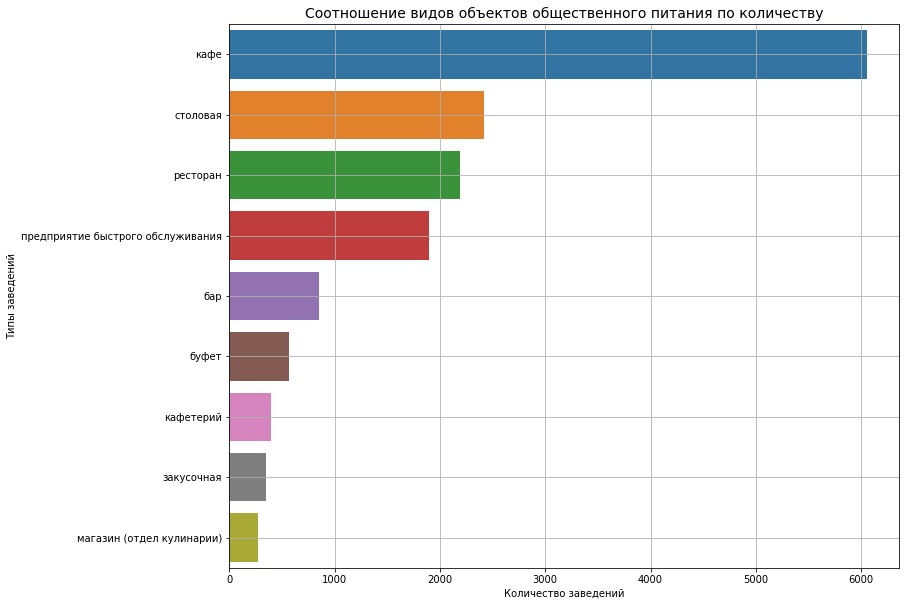

In [25]:
plt.rcParams["figure.figsize"] = (12,10)
ax = sns.barplot(x='count_ob', y='object_type', data=ob_type)
plt.title('Соотношение видов объектов общественного питания по количеству', fontsize=14)
ax.set(xlabel='Количество заведений', ylabel='Типы заведений')
sns.set_style("white")
plt.grid()
plt.show()

Наибольшую долю на рынке занимают кафе - 40%. Столовые - 16.8%. Рестораны - 14.9. Фастфуд - 12.5%

Меньше всего доля кафетериев и магазинов с отделом кулинарии - 2.6% и 1.8%

### Соотношение сетевых и несетевых заведений по количеству <a id="3"></a>

In [26]:
chain = df.groupby('chain',as_index=False).agg({'object_name' : 'count'})
chain

,chain,object_name
0,да,2931
1,нет,12064


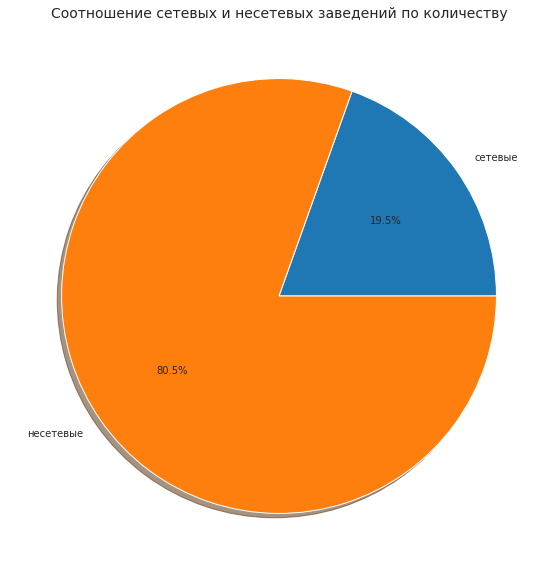

In [27]:
plt.rcParams["figure.figsize"] = (12,10)
plt.pie(chain['object_name'], 
        labels=['сетевые', 'несетевые'], 
        autopct='%1.1f%%',shadow=True)
plt.title('Соотношение сетевых и несетевых заведений по количеству',
              fontsize=14);
plt.show();

Доминируют несетевые заведения - 80.5%

### Сетевые виды объектов общественного питания <a id="4"></a>

In [28]:
franchise = df.query('chain == "да"').groupby('object_type', as_index=False).agg({'object_name' : 'count'})
franchise = franchise.rename(columns={'object_name' : 'count_chain'})
franchise = franchise.merge(ob_type, how='left')
franchise['ratio_chain'] = franchise['count_chain'] / franchise['count_ob'] * 100
franchise = franchise.sort_values(by='ratio_chain', ascending=False)
franchise

,object_type,count_chain,count_ob,mean_number,ratio_chain
6,предприятие быстрого обслуживания,784,1893,19.922874,41.415742
5,магазин (отдел кулинарии),78,273,5.589744,28.571429
7,ресторан,521,2189,82.974874,23.800822
3,кафе,1389,6054,38.967625,22.943508
2,закусочная,56,348,7.847701,16.091954
4,кафетерий,52,395,9.184810,13.164557
0,бар,37,852,41.061033,4.342723
1,буфет,11,571,49.248687,1.926445
8,столовая,3,2420,116.724380,0.123967


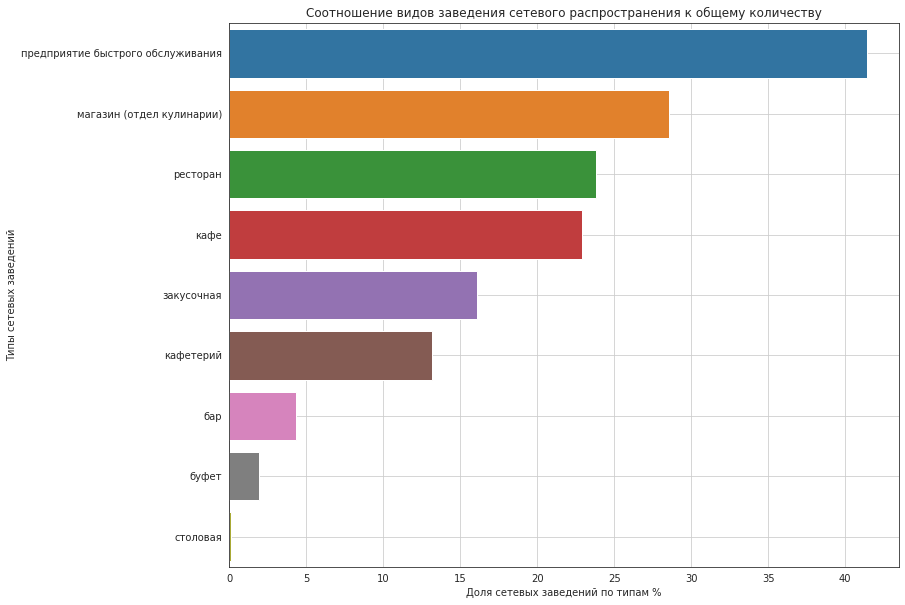

In [29]:
ax = sns.barplot(y='object_type', x='ratio_chain', data=franchise)
plt.title('Соотношение видов заведения сетевого распространения к общему количеству')
ax.set(xlabel='Доля сетевых заведений по типам %', ylabel='Типы сетевых заведений')
sns.set_style("white")
plt.grid()
plt.show()

Фастфуд по большей части сетевой - 41%. На втором месте и третьем месте: магазины(отдел кулинарии) и рестораны - 29% и 24%, соответсвенно.

### Анализ сетевых заведений <a id="5"></a>

In [30]:
df.query('chain == "да"')['number'].describe()

count    2931.000000
mean       49.646196
std        47.319400
min         0.000000
25%        15.000000
50%        40.000000
75%        70.000000
max       250.000000
Name: number, dtype: float64

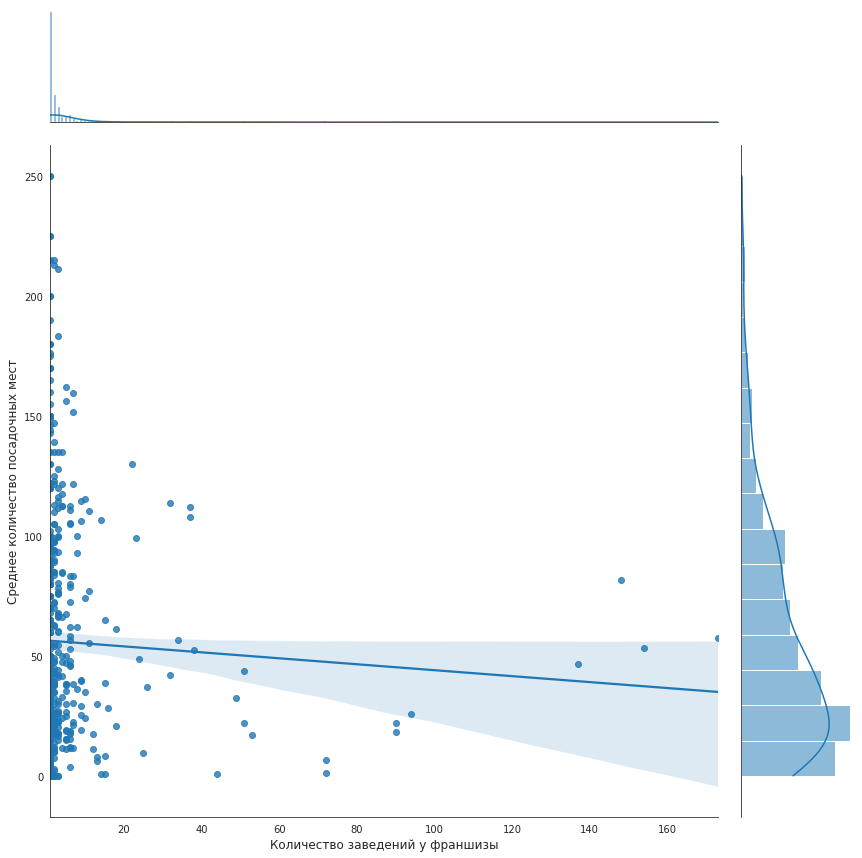

In [31]:
# Переменная с количеством объектов у франшизы и средним количеством посадочных мест в этих объектах
fr = df.query('chain == "да"').groupby('object_name').agg({'object_type' : 'count', 'number' : 'mean'}).reset_index()
ax = sns.jointplot(x='object_type', y='number', data=fr, kind='reg', height=12)
ax.set_axis_labels('Количество заведений у франшизы', 'Среднее количество посадочных мест', fontsize=12);

Большая доля франшиз имеет до 10 заведений. В среднем у этих заведений около 55 посадочных мест.

### Среднее количество посадочных мест по типу заведения <a id="6"></a>

In [32]:
ob_type_fr = (df.groupby(['object_type', 'chain'], as_index=False)
           .agg({'object_name' : 'count', 'number' : 'mean'})
           .sort_values(by='number', ascending=False))
ob_type_fr.head()

,object_type,chain,object_name,number
17,столовая,нет,2417,116.729830
16,столовая,да,3,112.333333
14,ресторан,да,521,90.408829
15,ресторан,нет,1668,80.652878
0,бар,да,37,53.027027


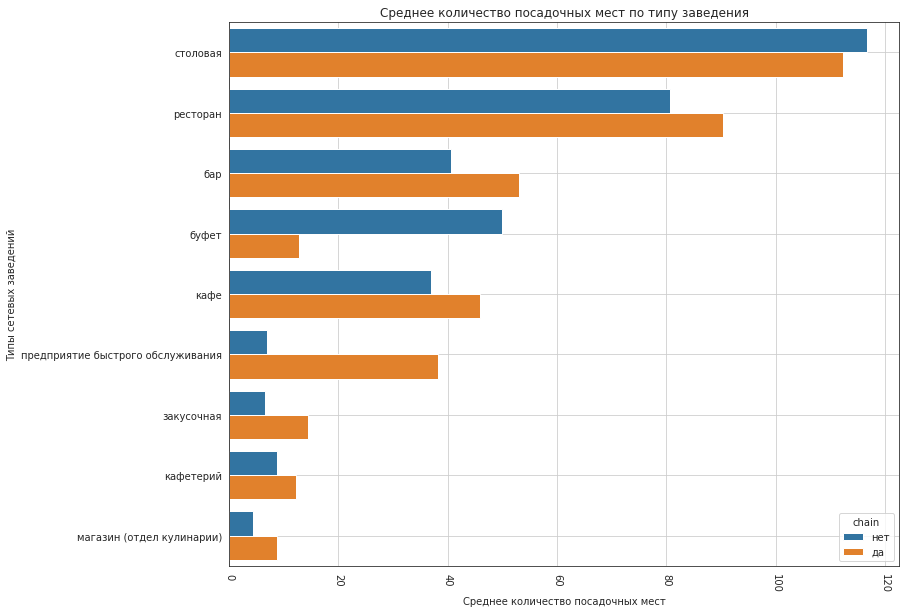

In [33]:
ax = sns.barplot(y='object_type', x='number', hue='chain', data=ob_type_fr)
plt.xticks(rotation=-90)
plt.title('Среднее количество посадочных мест по типу заведения')
ax.set(xlabel='Среднее количество посадочных мест', ylabel='Типы сетевых заведений')
sns.set_style("white")
plt.grid()
plt.show()

С большим отрывом на первом месте столовые, у них практически 116 посадочных мест в среднем.

Если сравнить сетевые заведениями с несетевыми, то за исключением столовых и буфетов, посадочных мест в среднем больше у сетевых. Фастфуд самый яркий пример: 10 мест у несетевых и почти сорок у сетевых

### Столбец с улицами

In [34]:
df['address'].value_counts()

город Москва, Ходынский бульвар, дом 4                          95
город Москва, Пресненская набережная, дом 2                     62
город Москва, проспект Мира, дом 211, корпус 2                  60
город Москва, Кировоградская улица, дом 13А                     52
город Москва, улица Земляной Вал, дом 33                        46
                                                                ..
город Москва, Летниковская улица, дом 2, строение 2              1
город Москва, Большая Переяславская улица, дом 1, строение 1     1
город Москва, улица Героев Панфиловцев, дом 13, корпус 1         1
город Москва, Планетная улица, дом 23                            1
город Москва, Строгинский бульвар, дом 1, корпус 2               1
Name: address, Length: 8903, dtype: int64

In [35]:
df.query('address.str.contains("Зеленоград")').head()

,id,object_name,chain,object_type,address,number
1386,22331,столовая миэт,нет,столовая,"город Москва, город Зеленоград, улица Юности, дом 11",56
1405,20199,это,нет,кафе,"город Москва, город Зеленоград, корпус 401",35
1406,68113,френдс,нет,кафе,"город Москва, город Зеленоград, корпус 435",34
1407,20105,кафе «граф монте-кристо»,нет,кафе,"город Москва, город Зеленоград, корпус 436",40
1408,22982,альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",49


In [36]:
# Делю по запятой адрес и вывожу только второй столбец с улицами
df['street'] = df['address'].str.split(',').str[1].str.strip(' ')
# Для поселений и Зеленограда сначала делю по запятой и вывожу второй и третий столбец, затем соединяю в один столбец, чтобы получить запись вида: "город Зеленоград, улица такая-то"
df['street'] = np.where((df['address'].str.contains('город Зеленоград')) | 
                              (df['address'].str.contains('поселение')), 
                              df['address'].str.split(',').str[1:3].str.join(','), df['street'])

print(df['street'].value_counts().head())
df.head()

проспект Мира             201
Профсоюзная улица         181
Ленинградский проспект    168
Пресненская набережная    164
Варшавское шоссе          155
Name: street, dtype: int64


,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


### Топ-10 улиц по количеству объектов общественного питания <a id="7"></a>

In [37]:
top_10_street = (df.groupby('street', as_index=False).agg({'object_name' : 'count'})
                 .sort_values(by='object_name', ascending=False).head(10)
                )
top_10_street

,street,object_name
1657,проспект Мира,201
1229,Профсоюзная улица,181
921,Ленинградский проспект,168
1215,Пресненская набережная,164
646,Варшавское шоссе,155
924,Ленинский проспект,144
1654,проспект Вернадского,126
912,Кутузовский проспект,111
838,Каширское шоссе,107
843,Кировоградская улица,104


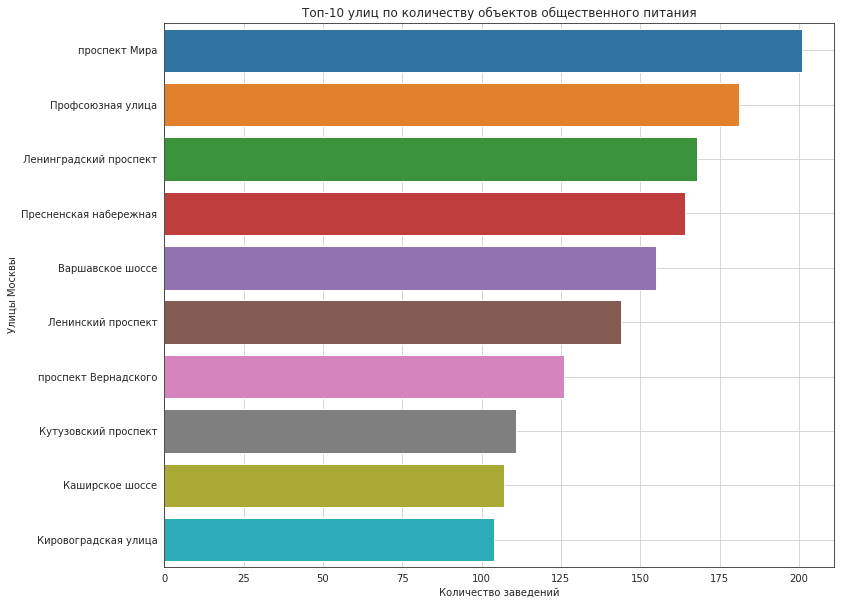

In [38]:
ax = sns.barplot(y='street', x='object_name', data=top_10_street)
plt.title('Топ-10 улиц по количеству объектов общественного питания')
ax.set(xlabel='Количество заведений', ylabel='Улицы Москвы')
sns.set_style("white")
plt.grid()
plt.show()

Топ 3 улиц по количеству заведений:

1. Проспект Мира - 200 шт.
2. Профсоюзная улица - 180 шт.
3. Ленинградский проспект - 170 шт.

#### Добыча данных по районам Москвы

In [39]:
# Предварительно скачанные датасеты улиц и районов залил на гугл документы и получил ссылку, ниже ай ди из ссылок
street_id = '1wRKHgs2YcueEk3cqGP_qFxjc9hgfUH-9kHmaXDS3aVk'
district_id = '1aAAvW0sZH-Tkpz9ngUNVwaGgqPOMu62Y8mYt3IBx1tU'
# путь к файлам на гугл докумет с форматированием
street = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(street_id)
district = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(district_id)
# Делаю запрос
req_street = requests.get(street)
req_dis = requests.get(district)
# Считываю файлы улиц и районов
df_street = pd.read_csv(BytesIO(req_street.content))
df_district = pd.read_csv(BytesIO(req_dis.content))

In [40]:
# Чтение файлов и поверхностынй анализ типов данных
df_street.info()
df_district.info()
display(df_street.head())
df_district.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5344 entries, 0 to 5343
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   UM_NAMEF     5344 non-null   object
 1   UM_NAMES     5344 non-null   object
 2   UM_CODE      5344 non-null   object
 3   UM_TRANS     5344 non-null   object
 4   UM_TYPE      5344 non-null   object
 5   UM_TM        1321 non-null   object
 6   UM_TE        5344 non-null   object
 7   UM_KLADR     5089 non-null   object
 8   global_id    5344 non-null   object
 9   UM_NAMEF_en  1 non-null      object
 10  UM_NAMES_en  1 non-null      object
 11  UM_CODE_en   1 non-null      object
 12  UM_TRANS_en  1 non-null      object
 13  UM_TYPE_en   1 non-null      object
 14  UM_TM_en     1 non-null      object
 15  UM_TE_en     1 non-null      object
 16  UM_KLADR_en  1 non-null      object
dtypes: object(17)
memory usage: 709.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157

,UM_NAMEF,UM_NAMES,UM_CODE,UM_TRANS,UM_TYPE,UM_TM,UM_TE,UM_KLADR,global_id,UM_NAMEF_en,UM_NAMES_en,UM_CODE_en,UM_TRANS_en,UM_TYPE_en,UM_TM_en,UM_TE_en,UM_KLADR_en
0,Полное наименование,Сокращённое наименование,Код,Транслитерация,Код вида,Код ОМК ТМ,Код ОМК ТЕ,Код КЛАДР,global_id,UM_NAMEF_en,UM_NAMES_en,UM_CODE_en,UM_TRANS_en,UM_TYPE_en,UM_TM_en,UM_TE_en,UM_KLADR_en
1,1-й Ирининский переулок,1-й Ирининский пер.,008880,Pervy'j Irininskij pereulok,002,NaN,0102,77000000000706300,58481065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2-й Ирининский переулок,2-й Ирининский пер.,008890,Vtoroj Irininskij pereulok,002,NaN,0102,77000000000362200,58481066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3-й Ирининский переулок,3-й Ирининский пер.,008891,Tretij Irininskij pereulok,002,NaN,0102,77000000000362300,58481067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Иркутская улица,Иркутская ул.,008910,Irkutskaya ulicza,001,NaN,0406,77000000000139700,58481068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Kod,Name,global_id,Latin_name,Type,Kod_okato
0,100,Центральный административный округ,58703558,Czentral`ny'j administrativny'j okrug,2,45286000
1,101,район Арбат,58703559,rajon Arbat,3,45286552
2,102,Басманный район,58703560,Basmanny'j rajon,3,45286555
3,103,район Замоскворечье,58703561,rajon Zamoskvorech`e,3,45286560
4,104,Красносельский район,58703562,Krasnosel`skij rajon,3,45286565


In [41]:
# Удалюя дубликат первой строки и оставляю необходимые столбцы
df_street = df_street.iloc[1:]
df_street = df_street[['UM_NAMEF', 'UM_TE']]
df_street.head()

,UM_NAMEF,UM_TE
1,1-й Ирининский переулок,0102
2,2-й Ирининский переулок,0102
3,3-й Ирининский переулок,0102
4,Иркутская улица,0406
5,1-й Иртышский проезд,0406


In [42]:
# Есть несколько идентификаторов районов для одной улицы
df_street.query('UM_NAMEF == "Ленинградский проспект"').head()

,UM_NAMEF,UM_TE
444,Ленинградский проспект,0201;0202;0214;0217


In [43]:
# Разбиваю строки с несколькими идентификаторами на отдельные строки
df_street = df_street.assign(UM_TE=df_street['UM_TE'].str.split(';')).explode('UM_TE')
df_street.query('UM_NAMEF == "Ленинградский проспект"').head()

,UM_NAMEF,UM_TE
444,Ленинградский проспект,0201
444,Ленинградский проспект,0202
444,Ленинградский проспект,0214
444,Ленинградский проспект,0217


In [44]:
# Удаляю ноль слева, чтобы правильно соединить таблицу улиц с районами
df_street['UM_TE'] = df_street['UM_TE'].str.lstrip('0')
df_street['UM_TE'].value_counts().head()

1207    216
108     178
107     173
1206    167
102     153
Name: UM_TE, dtype: int64

In [45]:
# Привожу к одному типу данные столбцов, то етсь тут в строку, так акк там тоже строка в улицах
df_district['Kod'] = df_district['Kod'].astype('str')
# Соединяю и удаляю лишний столбец
df_street = df_street.merge(df_district[['Name', 'Kod']], how = 'left',
                left_on = 'UM_TE', right_on = 'Kod').drop(columns = ['Kod'])

In [46]:
df_street.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6025 entries, 0 to 6024
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UM_NAMEF  6025 non-null   object
 1   UM_TE     6025 non-null   object
 2   Name      6022 non-null   object
dtypes: object(3)
memory usage: 188.3+ KB


In [47]:
df_street.query('Name.isna()').head()

,UM_NAMEF,UM_TE,Name
3830,Остафьевское шоссе,1102,NaN
3831,Остафьевское шоссе,1108,NaN
6006,улица Лётчика Осканова,0209,NaN


 По двум улицам данных по району нет. Это не влияет на исследование.

In [48]:
top_10_street = top_10_street.merge(df_street[['Name', 'UM_NAMEF']], how='left',
                                   left_on = 'street', right_on = 'UM_NAMEF').drop(columns = ['UM_NAMEF'])

In [49]:
top_10_street

,street,object_name,Name
0,проспект Мира,201,Мещанский район
1,проспект Мира,201,Алексеевский район
2,проспект Мира,201,район Марьина Роща
3,проспект Мира,201,Останкинский район
4,проспект Мира,201,район Ростокино
5,проспект Мира,201,район Свиблово
6,проспект Мира,201,Ярославский район
7,Профсоюзная улица,181,Академический район
8,Профсоюзная улица,181,район Коньково
9,Профсоюзная улица,181,Обручевский район


In [50]:
top_10_street['Name'].value_counts()

район Проспект Вернадского         2
район Тёплый Стан                  2
район Чертаново Центральное        2
район Нагатино-Садовники           2
район Чертаново Северное           2
район Тропарёво-Никулино           2
Обручевский район                  2
Ломоносовский район                2
район Чертаново Южное              2
Донской район                      2
Гагаринский район                  2
район Коньково                     1
район Марьина Роща                 1
Хорошёвский район                  1
район Якиманка                     1
район Раменки                      1
район Ясенево                      1
район Сокол                        1
район Беговой                      1
Ярославский район                  1
Останкинский район                 1
район Свиблово                     1
район Москворечье-Сабурово         1
район Орехово-Борисово Северное    1
Академический район                1
район Дорогомилово                 1
Пресненский район                  1
р

In [51]:
# соединяю через запятую районы для улиц, удобней читать
top_10_street = top_10_street.groupby('street')['Name'].apply(', '.join).reset_index()
top_10_street

,street,Name
0,Варшавское шоссе,"Донской район, район Нагатино-Садовники, Нагорный район, район Чертаново Северное, район Чертаново Центральное, район Чертаново Южное, район Северное Бутово, район Южное Бутово, поселение Щербинка"
1,Каширское шоссе,"район Москворечье-Сабурово, район Нагатино-Садовники, район Орехово-Борисово Северное, район Орехово-Борисово Южное"
2,Кировоградская улица,"район Чертаново Северное, район Чертаново Центральное, район Чертаново Южное"
3,Кутузовский проспект,"район Дорогомилово, район Фили-Давыдково"
4,Ленинградский проспект,"район Аэропорт, район Беговой, район Сокол, Хорошёвский район"
5,Ленинский проспект,"район Якиманка, Донской район, Гагаринский район, Ломоносовский район, Обручевский район, район Тёплый Стан, район Проспект Вернадского, район Тропарёво-Никулино"
6,Пресненская набережная,Пресненский район
7,Профсоюзная улица,"Академический район, район Коньково, Обручевский район, район Тёплый Стан, район Черёмушки, район Ясенево"
8,проспект Вернадского,"Гагаринский район, Ломоносовский район, район Проспект Вернадского, район Раменки, район Тропарёво-Никулино"
9,проспект Мира,"Мещанский район, Алексеевский район, район Марьина Роща, Останкинский район, район Ростокино, район Свиблово, Ярославский район"


Топ десять улиц наполненных общепитами найден и каждой соответсвует район, по которым проходит улица.

Также видны районы, в которых пересекаются две "общепитовые" улицы. 

Количество заведений не самый информативный показатель того, насколько популярна улица среди рестораторов. Лучше узнать плотность заведений на улице. Ведь те улицы, которые сейчас в топе, могут быть просто очень длинными, что кстати видно по районам, они распростираются сразу на несколько районов.

Я взял с сайта https://data.mos.ru/ файлы классификации Москвы по улицам и районам. Объединил их по коду района, затем полученную таблицу объединил с нашим топом по названию улицы.

### Число улиц с одним объектом общественного питания <a id="8"></a>

In [52]:
# Группирую по улицам и оставляю срезом только улицы с одним объектом
one_ob = df.groupby('street').agg({'object_name' : 'count'}).reset_index()
one_ob = one_ob.rename(columns={'object_name' : 'count_ob'})
one_ob = one_ob.query('count_ob == 1')
# Соединяю с районами
one_ob = one_ob.merge(df_street[['Name', 'UM_NAMEF']], how='left',
                     left_on='street', right_on='UM_NAMEF').drop(columns = ['UM_NAMEF'])
one_ob.tail()

,street,count_ob,Name
799,улица Шеногина,1,район Хорошёво-Мнёвники
800,улица Шумилова,1,район Кузьминки
801,улица Шумкина,1,район Сокольники
802,улица Щорса,1,район Солнцево
803,шоссе Фрезер,1,Нижегородский район


In [53]:
# Создаю переменную с топом самых незагруженных районов
top_10_one = one_ob.groupby('Name').agg({'street' : 'count'}).reset_index().sort_values(by='street', ascending=False).head(10)
top_10_one 

,Name,street
24,Таганский район,28
104,район Хамовники,27
3,Басманный район,25
25,Тверской район,21
21,Пресненский район,19
74,район Марьина Роща,18
43,район Арбат,17
14,Мещанский район,16
97,район Сокольники,15
56,район Замоскворечье,14


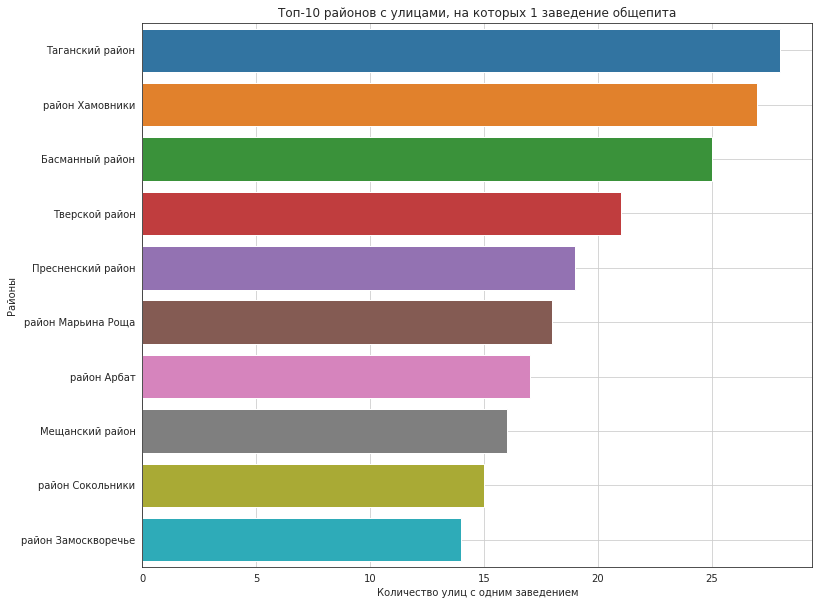

In [54]:
ax = sns.barplot(x='street', y='Name', data=top_10_one)
plt.title('Топ-10 районов с улицами, на которых 1 заведение общепита')
ax.set(xlabel='Количество улиц с одним заведением', ylabel='Районы')
sns.set_style("white")
plt.grid()
plt.show()

In [55]:
one_ob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 0 to 803
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   street    804 non-null    object
 1   count_ob  804 non-null    int64 
 2   Name      623 non-null    object
dtypes: int64(1), object(2)
memory usage: 25.1+ KB


**Топ незагруженных районов Москвы:**

1. Таганский
2. Хамовники
3. Басманный
4. Тверской

Есть пропуски - это связано с тем, что в файле с сайта Москвы нет Зеленограда и поселений. Можно по той же схеме найти данные по зеленограду и поселениям, но я просто буду держать их в уме. Так бы я сделал, если бы Зеленоград вошел в топ самых наполненных общепитами улиц. <a id="9"></a>

## Вывод <a id="10"></a>

Промежуточные выводы:

* При обработке данных було удалено **6%** данных: 5% аномалий и 1% неявных дубликатов.

* Наибольшую долю на рынке занимают кафе - **40%**. Второе место - столовые, **16.8%**. Внушительный отрыв на **23%**.

* На рынке общепита доминируют несетевые заведения - **80.5%**.

* В сетевом секторе наиболее популярны фастфуды - **41%**. Кафе занимает **23%** рынка.

* Большая доля франшиз имеет до **10 заведений**. В среднем у этих заведений около **55 посадочных мест**.

* Среди франшиз по посадочным местам лидируют столовые -  **116 посадочных мест в среднем**. 

* Если сравнить сетевые заведениями с несетевыми, то за исключением столовых и буфетов, посадочных мест в среднем больше у сетевых. Фастфуд самый яркий пример: **10 мест** у несетевых и почти **40** у сетевых. У кафе различие менее внушительное: **38 мест** у несетевых против **45 мест** сетевых.

* Самые загруженные общепитами улицы:Проспект Мира - **200 шт.**, Профсоюзная улица - **180 шт.**, Ленинградский проспект - **170 шт.**

* Наименее загруженные заведениями и перспективные районы Москвы: Таганский - **28 улиц с одним заведением**, Хамовники - **27**, Басманный - **25**.


Рекомендации:

**Учитывая полученные выше данные, наиболее перспективно открыть кафе не по франшизе, с количеством посадочных мест около 40. Территориально выгодно открыть кафе в следующих районах: Таганский, Хамовники, Басманный, Тверской. Они менее загружены и концепт кафе с роботами оценят лучше в центре Москвы, нежели на окраинах, так как есть поток туристов.**